In [30]:
!pip install xgboost
import time
from xgboost.sklearn import XGBRegressor
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
li = []
with open('adult.data') as f:
    lines = f.readlines()
    for line in lines:
        li.append(line[:-1].split(", "))

df = pd.DataFrame(li)


In [3]:
li = []
with open('adult.test') as f:
    lines = f.readlines()
    for line in lines:
        li.append(line[:-1].split(", "))

df_test = pd.DataFrame(li)

In [4]:
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df = df.rename(columns={0: "age", 1: "workclass", 2: "fnlwgt", 3: "education", 4: "education-num", 5: "marital-status", 6: "occupation", 7: "relationship", 8: "race", 9: "sex", 10: "capital-gain", 11: "capital-loss", 12: "hours-per-week", 13: "native-country", 14: "income"})
df = df.dropna()

In [7]:
df_test = df_test.rename(columns={0: "age", 1: "workclass", 2: "fnlwgt", 3: "education", 4: "education-num", 5: "marital-status", 6: "occupation", 7: "relationship", 8: "race", 9: "sex", 10: "capital-gain", 11: "capital-loss", 12: "hours-per-week", 13: "native-country", 14: "income"})
df_test = df_test.dropna()

In [8]:
label_workclass = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
label_occupation = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
label_native_country = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']
unknown_index = []
unknown_index_test = []
for i in range(len(df['workclass'])):
    if df['workclass'][i] not in label_workclass:
        unknown_index.append(i)

for i in range(len(df['occupation'])):
    if df['occupation'][i] not in label_occupation:
        unknown_index.append(i)

for i in range(len(df['native-country'])):
    if df['native-country'][i] not in label_native_country:
        unknown_index.append(i)
        
for i in range(len(df_test['workclass'])):
    if df_test['workclass'][i] not in label_workclass:
        unknown_index_test.append(i)
        
for i in range(len(df_test['occupation'])):
    if df_test['occupation'][i] not in label_occupation:
        unknown_index_test.append(i)
        
for i in range(len(df_test['native-country'])):
    if df_test['native-country'][i] not in label_native_country:
        unknown_index_test.append(i)
df = df.drop(set(unknown_index))
df_test = df_test.drop(set(unknown_index_test))

In [9]:
# drop meaningless column
df = df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'native-country'])
df_test = df_test.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'native-country'])

In [10]:
# one-hot encoding on nominal value columns
df = pd.get_dummies(df, dtype=int, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
df_test = pd.get_dummies(df_test, dtype=int, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [11]:
# Binarization of income column
df = df.replace({'<=50K': 0, ">50K": 1})
df_test = df_test.replace({'<=50K.': 0, ">50K.": 1})

In [12]:
# x = df[::].drop(columns=['income'])
# y = df[:]['income']
train_x, train_y = df[::].drop(columns=['hours-per-week']), df[:]['hours-per-week']
test_x, test_y = df_test[::].drop(columns=['hours-per-week']), df_test[:]['hours-per-week']
test_y = test_y.astype(int)
train_y = train_y.astype(int)

In [13]:
# feature normalization
mean = np.mean([int(x) for x in train_y])
std = np.std([int(x) for x in train_y])
train_y_normalize = [(int(x) - mean) / std for x in train_y]

mean = np.mean([int(x) for x in test_y])
std = np.std([int(x) for x in test_y])
test_y_normalize = [(int(x) - mean) / std for x in test_y]

In [19]:
# KNN
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x, train_y)
predict_y = neigh.predict(test_x)
scores = cross_val_score(neigh, train_x, train_y, cv=10)
print('='*10 + "KNeighborsClassifier" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % neigh.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print('%0.4f' % neigh.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "MAE" + '-'*10)
print(mean_absolute_error(test_y,predict_y))
print('-'*10 + "MAPE" + '-'*10)
print(np.mean(np.abs((predict_y - test_y) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('-'*10 + 'Time consumption' + '-'*10)
print("%0.4s Seconds"%(time.time() - start_time))
print('='*10 + "End of Performance" + '='*10)

C:\Users\Ken\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


==========KNeighborsClassifier==========
----------Training Accuracy----------
0.5423
----------Test Accuracy----------
0.3335
----------10-fold Cross Validatoin Accuracy----------
0.3422
----------MAE----------
9.111221779548472
----------MAPE----------
0.43792033583788037
----------RMSE----------
14.067681685149402
----------Time consumption----------
6.11 Seconds
==========End of Performance==========


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train_x, train_y)

In [ ]:
predict_y = regr.predict(test_x)
scores = cross_val_score(regr, train_x, train_y, cv=10)

In [ ]:
print('='*10 + "SVR" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % regr.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print('%0.4f' % regr.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "MAE :" + '-'*10)
print(mean_absolute_error(test_y,predict_y))
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - test_y1) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('='*10 + "End of Performance" + '='*10)

In [32]:
start_time = time.time()
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train_x, train_y)
predict_y = regr.predict(test_x)
scores = cross_val_score(regr, train_x, train_y, cv=10)
print('='*10 + "SVR" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % regr.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print('%0.4f' % regr.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "MAE :" + '-'*10)
print(mean_absolute_error(test_y,predict_y))
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - test_y) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('-'*10 + 'Time consumption' + '-'*10)
print("%0.4s Seconds"%(time.time() - start_time))
print('='*10 + "End of Performance" + '='*10)

==========SVR==========
----------Training Accuracy----------
0.2042
----------Test Accuracy----------
0.1880
----------10-fold Cross Validatoin Accuracy----------
0.1870
----------MAE :----------
6.705246199992309
----------MAPE :----------
0.1679625861571208
----------RMSE----------
10.869428407051807
----------Time consumption----------
498. Seconds
==========End of Performance==========


In [22]:
# RandomForest
start_time = time.time()
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_x, train_y)
predict_y = regr.predict(test_x)
scores = cross_val_score(regr, train_x, train_y, cv=10)
print('='*10 + "RandomForestregression" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % regr.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print('%0.4f' % regr.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "MAE :" + '-'*10)
print(mean_absolute_error(test_y,predict_y))
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - test_y) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('-'*10 + 'Time consumption' + '-'*10)
print("%0.4s Seconds"%(time.time() - start_time))
print('='*10 + "End of Performance" + '='*10)

==========RandomForestregression==========
----------Training Accuracy----------
0.1479
----------Test Accuracy----------
0.1474
----------10-fold Cross Validatoin Accuracy----------
0.1441
----------MAE :----------
7.569709296887374
----------MAPE :----------
0.18903820301347407
----------RMSE----------
11.137997226483026
----------Time consumption----------
9.92 Seconds
==========End of Performance==========


In [24]:
le=LabelEncoder()
train_x2 = train_x[::]
train_x2['education-num'] = le.fit_transform(train_x2['education-num'])
train_x2 = train_x2[::].drop(columns=['age'])
test_x2 = test_x[::]
test_x2['education-num'] = le.fit_transform(test_x2['education-num'])
test_x2 = test_x2[::].drop(columns=['age'])

In [26]:
# XGBoost
start_time = time.time()
xgbrModel = XGBRegressor()
xgbrModel.fit(train_x2, train_y)
predict_y=xgbrModel.predict(test_x2)
print('='*10 + "XGBRegressor" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % xgbrModel.score(train_x2,train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print('%0.4f' % xgbrModel.score(test_x2,test_y))
print('-'*10 + "MAE :" + '-'*10)
print(mean_absolute_error(test_y,predict_y))
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - test_y) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('-'*10 + 'Time consumption' + '-'*10)
print("%0.4s Seconds"%(time.time() - start_time))
print('='*10 + "End of Performance" + '='*10)

==========XGBRegressor==========
----------Training Accuracy----------
0.3242
----------Test Accuracy----------
0.1870
----------MAE :----------
7.321632378414807
----------MAPE :----------
0.18550355609113056
----------RMSE----------
10.875971950118924
----------Time consumption----------
0.20 Seconds
==========End of Performance==========


In [27]:
impxgb=xgbrModel.feature_importances_
importfeaturesxgr=pd.DataFrame(impxgb,columns=['featureimportant'])
li_feature_imp = list(importfeaturesxgr["featureimportant"])
li_feature_name = list(test_x2.columns)
feature_list = list(zip(li_feature_name, li_feature_imp))
feature_list = sorted(feature_list, key=lambda x: x[1], reverse=True)

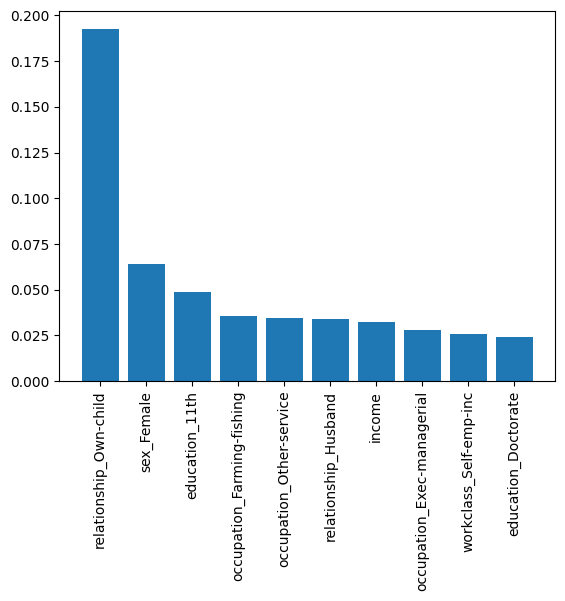

In [28]:
import matplotlib.pyplot as plt
feature_list_top_10 = feature_list[:10]
x = [x for x in range(1, len(feature_list_top_10)+1)]
h = [x[1] for x in feature_list_top_10]
plt.bar(x,h, tick_label=[x[0] for x in feature_list_top_10])
plt.xticks(rotation=90)
plt.show()

In [29]:
feature_list_top_10

[('relationship_Own-child', 0.19255411624908447),
 ('sex_Female', 0.064119353890419),
 ('education_11th', 0.04862157627940178),
 ('occupation_Farming-fishing', 0.03556974604725838),
 ('occupation_Other-service', 0.034490250051021576),
 ('relationship_Husband', 0.03373435139656067),
 ('income', 0.0322229228913784),
 ('occupation_Exec-managerial', 0.027712076902389526),
 ('workclass_Self-emp-inc', 0.0257976483553648),
 ('education_Doctorate', 0.024347936734557152)]